MULTIPLE LINEAR REGRESSION 
RMSE: 100444.06055558482
R² Score: 0.9179971706834331


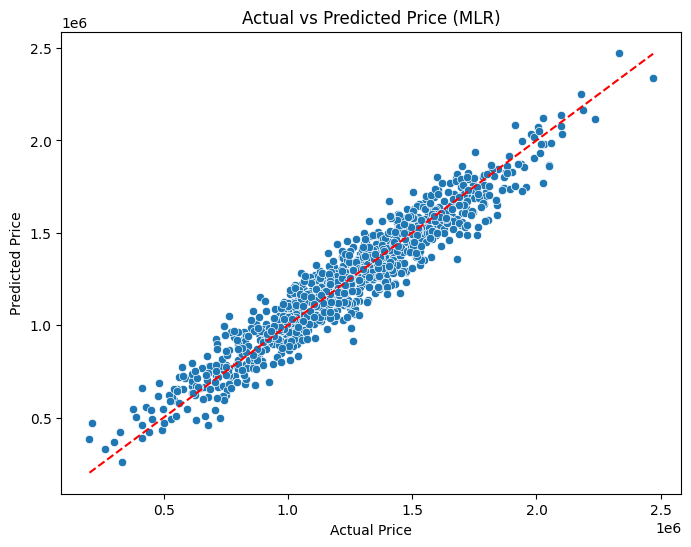

In [ ]:

# Multiple Linear Regression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("USA_Housing.csv")

# Features & target - Drop 'Address' column as it's non-numeric
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

# Prediction
y_pred = mlr.predict(X_test_scaled)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MULTIPLE LINEAR REGRESSION ")
print("RMSE:", rmse)
print("R² Score:", r2)

# Graph: Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (MLR)")
plt.show()

RIDGE REGRESSION (WITHOUT TUNING)
RMSE: 100444.03 USD
R² Score: 0.9180

RIDGE REGRESSION (WITH TUNING)
Best Alpha: {'alpha': np.float64(0.6250551925273969)}
RMSE: 100444.03 USD
R² Score: 0.9180

Top 5 Most Important Features (Ridge):
Avg. Area Income                231704.561631
Avg. Area House Age             163554.299388
Area Population                 152210.965642
Avg. Area Number of Rooms       120699.601622
Avg. Area Number of Bedrooms      3004.214501
dtype: float64


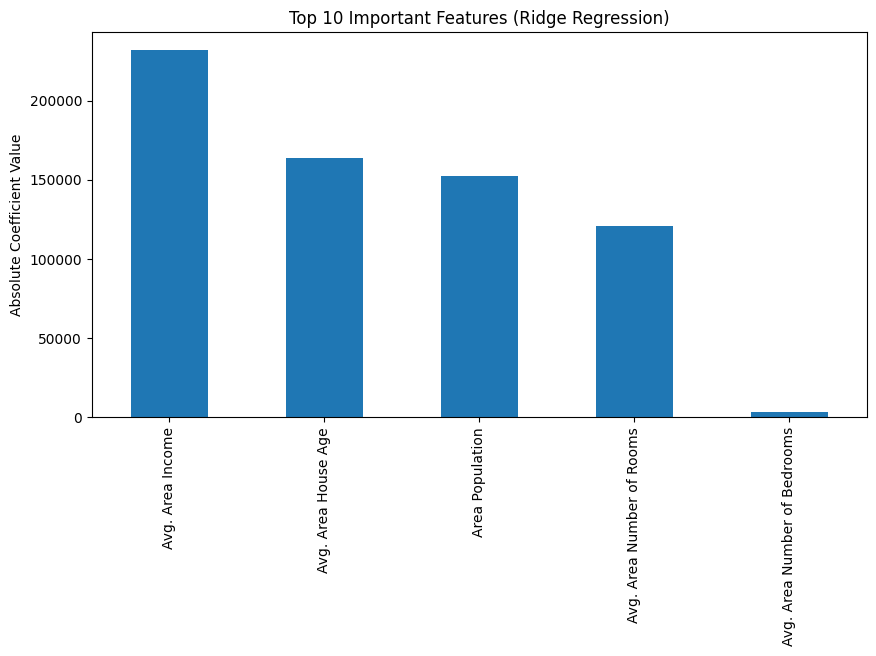

In [ ]:
# ============================================
# Ridge Regression - USA Housing (Final)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ---------- Load dataset ----------
df = pd.read_csv("USA_Housing.csv")

# Drop non-numeric column
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================================
# RIDGE REGRESSION (WITHOUT HYPERPARAMETER TUNING)
# ======================================================

ridge_default = Ridge()
ridge_default.fit(X_train_scaled, y_train)

y_pred_def = ridge_default.predict(X_test_scaled)

rmse_def = np.sqrt(mean_squared_error(y_test, y_pred_def))
r2_def = r2_score(y_test, y_pred_def)

print("RIDGE REGRESSION (WITHOUT TUNING)")
print(f"RMSE: {rmse_def:.2f} USD")
print(f"R² Score: {r2_def:.4f}")

# ======================================================
# RIDGE REGRESSION (WITH HYPERPARAMETER TUNING)
# ======================================================

ridge_params = {'alpha': np.logspace(-2, 2, 50)}

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring='r2'
)

ridge_grid.fit(X_train_scaled, y_train)
best_ridge = ridge_grid.best_estimator_

y_pred = best_ridge.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nRIDGE REGRESSION (WITH TUNING)")
print("Best Alpha:", ridge_grid.best_params_)
print(f"RMSE: {rmse:.2f} USD")
print(f"R² Score: {r2:.4f}")

# ======================================================
# IMPORTANT FEATURES (RIDGE)
# ======================================================

ridge_importance = pd.Series(
    best_ridge.coef_,
    index=X.columns
).abs().sort_values(ascending=False)

print("\nTop 5 Most Important Features (Ridge):")
print(ridge_importance.head(5))

# ---------- Graph: Ridge Coefficients ----------
plt.figure(figsize=(10,5))
ridge_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features (Ridge Regression)")
plt.ylabel("Absolute Coefficient Value")
plt.show()


LASSO REGRESSION (WITHOUT TUNING)
RMSE: 100444.01 USD
R² Score: 0.9180

LASSO REGRESSION (WITH TUNING)
Best Alpha: {'alpha': np.float64(1.5264179671752334)}
RMSE: 100443.90 USD
R² Score: 0.9180

Top 5 Most Important Features (Lasso):
Avg. Area Income                231740.607670
Avg. Area House Age             163579.448970
Area Population                 152234.290495
Avg. Area Number of Rooms       120726.839601
Avg. Area Number of Bedrooms      2989.966111
dtype: float64


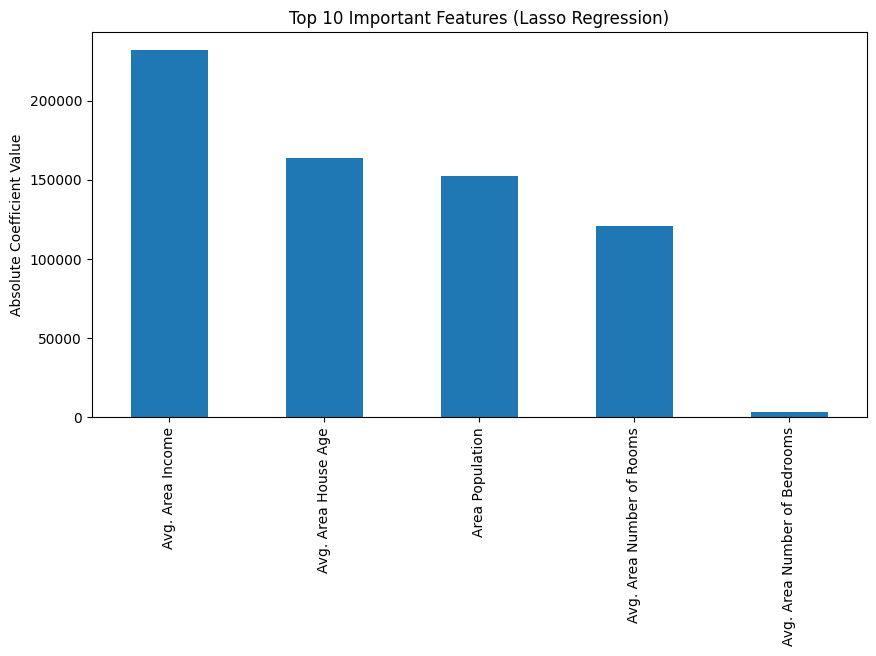

In [ ]:
# ============================================
# Lasso Regression - USA Housing (Final)
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ---------- Load dataset ----------
df = pd.read_csv("USA_Housing.csv")

# Drop non-numeric column
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ======================================================
# LASSO REGRESSION (WITHOUT HYPERPARAMETER TUNING)
# ======================================================

lasso_default = Lasso(max_iter=5000)
lasso_default.fit(X_train_scaled, y_train)

y_pred_def = lasso_default.predict(X_test_scaled)

rmse_def = np.sqrt(mean_squared_error(y_test, y_pred_def))
r2_def = r2_score(y_test, y_pred_def)

print("LASSO REGRESSION (WITHOUT TUNING)")
print(f"RMSE: {rmse_def:.2f} USD")
print(f"R² Score: {r2_def:.4f}")

# ======================================================
# LASSO REGRESSION (WITH HYPERPARAMETER TUNING)
# ======================================================

lasso_params = {'alpha': np.logspace(-4, 1, 50)}

lasso_grid = GridSearchCV(
    Lasso(max_iter=5000),
    lasso_params,
    cv=5,
    scoring='r2'
)

lasso_grid.fit(X_train_scaled, y_train)
best_lasso = lasso_grid.best_estimator_

y_pred = best_lasso.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nLASSO REGRESSION (WITH TUNING)")
print("Best Alpha:", lasso_grid.best_params_)
print(f"RMSE: {rmse:.2f} USD")
print(f"R² Score: {r2:.4f}")

# ======================================================
# IMPORTANT FEATURES (LASSO) ⭐⭐⭐
# ======================================================

lasso_importance = pd.Series(
    best_lasso.coef_,
    index=X.columns
).abs().sort_values(ascending=False)

print("\nTop 5 Most Important Features (Lasso):")
print(lasso_importance.head(5))

# ---------- Graph: Lasso Coefficients ----------
plt.figure(figsize=(10,5))
lasso_importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features (Lasso Regression)")
plt.ylabel("Absolute Coefficient Value")
plt.show()
